# Class 17: Interactive graphics and maps

Plan for today:
- Interactive graphics using plotly
- Maps using geopandas


## Notes on the class Jupyter setup

If you have the *ydata123_2023e* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook).  

In [17]:
import YData

# YData.download.download_class_code(17)   # get class code    
# YData.download.download_class_code(17, TRUE) # get the code with the answers 

#YData.download.download_data("States_shapefile.geojson")
YData.download.download_data("ne_110m_graticules_10.prj")
YData.download.download_data("ne_110m_graticules_10.shp")
YData.download.download_data("ne_110m_graticules_10.shx")
YData.download.download_data("ne_110m_graticules_10.dbf")


There are also similar functions to download the homework:

In [18]:
# YData.download.download_homework(7)  # downloads the homework 

If you are using colabs, you should install polars and the YData packages by uncommenting and running the code below.

In [19]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#from datetime import datetime
#import statistics


import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data visualization with plotly

To get back in the flow of doing Data Science after the long spring break, let's continue with data visualization, but this time we will focus on interactive visualizations using the [plotly express package](https://plotly.com/python/plotly-express/). 

Interactive visualizations can't be used with statitic report (such as the pdf used for your class project) but they are useful for exploring data to understand key trends, and these types of graphics can be embedded in webpages. 

Let's start with our favoriate data set to visualize, the gapminder data! The gapminder data comes with the plotly package and can be loaded using the code below.



In [4]:
import plotly.express as px

gapminder = px.data.gapminder()   # the plotly package comes with the gapminder data

print(type(gapminder))

gapminder.head(3)

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4


Let's now get the the gapminder data from 2007. As you know, we can do this using Boolean masking. We can also do this using the `.query()` method!


In [5]:
gapminder_2007 = gapminder[gapminder['year'] == 2007]

gapminder_2007_alt = gapminder.query("year==2007")

gapminder_2007.equals(gapminder_2007_alt)


True

Note if we use the `.query()` method with a column that contains strings, we need to use nested strings to get appropriate rows.

In [6]:
# Get only countries in Asia using the .query() method

gapminder_asia = gapminder.query("continent == 'Asia'")

gapminder_asia.head(3)


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4


Let's now recreate our scatter plot of country life expectancy as a function of GDP per capita using the `gapminder_2007` data using plotly. In particularly, we can use the `px.scatter(data_frame = , x = , y = , ...)` method which works similar to seaborn's `sns.relplot()` function. 

Let's try out the `px.scatter(data_frame = , x = , y = , ...)` function use the following mappings: 

- `x`: GDP per capita
- `y`: Life Expectancy
- `size`:  The country population
- `color`: Continent 

We can also set the following properties:

- `hover_name`: The name of the country
- `log_x`: Set it to True to make the x-axis on a log10 scale
- `max_size`: Set it to 60 to make the scaling for the population display better

Finally, if we want to have separate facets for columns we can use `facet_col`.



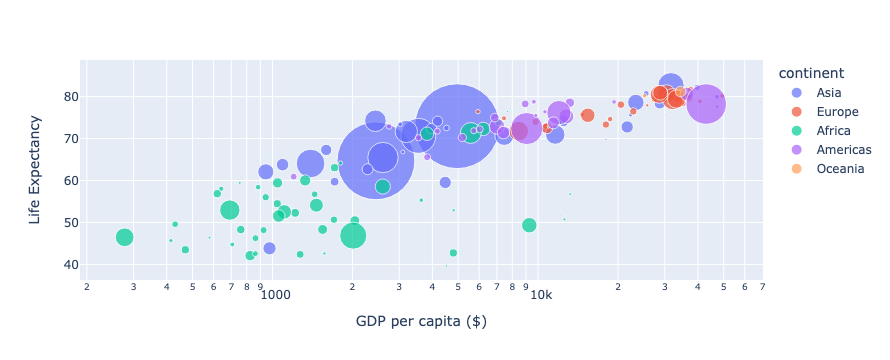

In [8]:
# Create a scatter plot in plotly
fig = px.scatter(data_frame = gapminder_2007, x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)

# Add axis labels
fig.update_layout(xaxis_title="GDP per capita ($)",
                 yaxis_title="Life Expectancy")


fig.show()

### Animations

We can also add animations to out plots using the following arguments:

- `animation_frame`: defines which variable to animate over; i.e., each frame in the animation will be one value of this variable.

- `animation_group`: Values from this column or array_like are used to provide object-constancy across animation frames: rows with matching `animation_group`s will be treated as if they describe the same object in each frame. This allows the animation to smoothly interpolate between frames. 

We can also set the x and y ranges of our plots to match the ranges of data over the full animation sequence. 

- `range_x`: The range that the x-values should take
- `range_y`: The range that the y-values should take


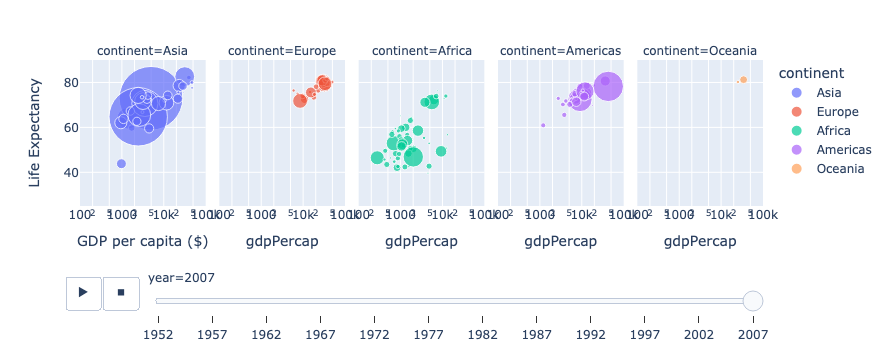

In [9]:
fig = px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])


fig.show()

### Additional visualizations

There are a number of other visualizations we can create using plotly. Let's briefly explore line graphs, sunburst plots and treemaps. 

Please see the plotly express documentation to learn more about other plots you can create:  https://plotly.com/python/plotly-express/



#### Line plots

Let's create a line plot showing life expectancy as a function of the year using the `px.line()` method. In particular, let's set the followign properties of the plot: 

- `x`: Year
- `y`: Life expectancy
- `color`: The continent
- `line_group`: The country
- `hover_name`: The country
- `line_shape`: spline
- `render_mode`: svg to use svg graphics

What do you think of this plot? 


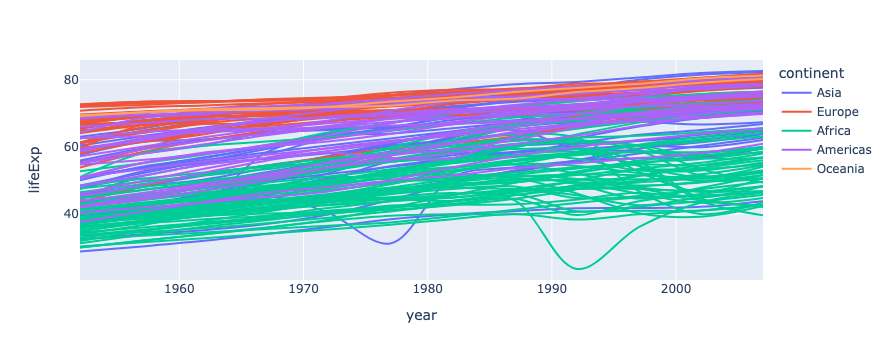

In [27]:
fig = px.line(gapminder, x="year", y="lifeExp", color="continent", line_group="country", hover_name="country",
        line_shape="spline", render_mode="svg")

fig.show()

#### Sunburst plots

Sunburst is a generalization of a pie chart for data that has a hierarchical structure; i.e., it can plot categorical data that has a hierarchical structure.

Let's create a sunburst plot showing how much of the world's population is in each continent at the inner level, and then each country within each continent at the outer level. In particular, let's set the following properties:

- `path`: Should be a list with continent at the inner level and country at the outer level.
- `values`: Should specify that the angle of each segment is given by the countries population 
- `color`: Set to the countries' life expectancies


What do you think of this plot? 


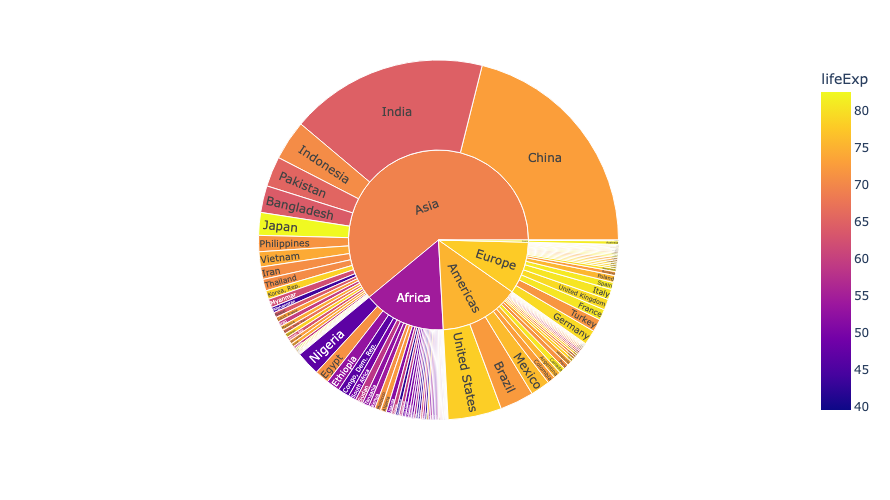

In [28]:
fig = px.sunburst(gapminder_2007, path=['continent', 'country'], values='pop', color='lifeExp')
fig.update_layout(width = 500, height = 500)

#### Treemap

Treemaps allow one to view hierarchical relationships by creating a sequence of nested rectangles. We can use plotly's `px.treemap()` function to create interactive tree maps.

Let's create an interactive treemap showing the population of each country separately for each continent, as well as color each country based on the average life expectancy. In particular, let's set the following properties:

- `path`: Should be a list with continent at the highest level and country nested within continent. We can also set the first argument of the list to be px.Constant('world') so that at the highest level we get the label "world". 
- `values`: Should specify that the size of each rectangle is equal to a country's population 
- `color`: Set to the countries' life expectancies

What do you think of this plot? 


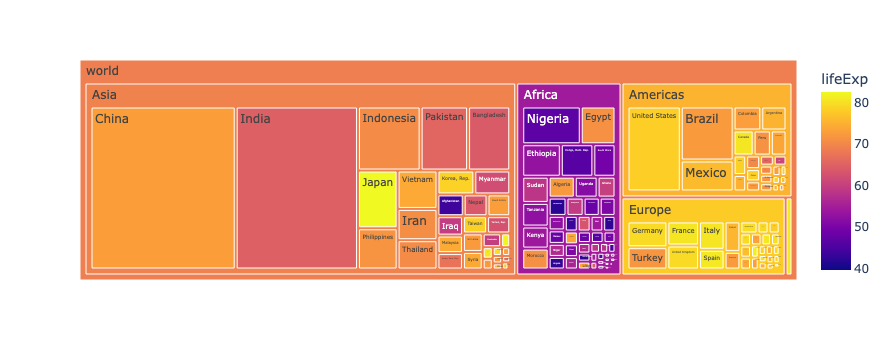

In [29]:
fig = px.treemap(gapminder_2007, path=[px.Constant('world'), 'continent', 'country'], 
                 values='pop', color='lifeExp')
fig.show()

#### Pivot tables and heatmaps

Heatmaps allow us to view data that is a function of two variables. 

In order to create a heatmap, we first need first transformat out data into a DataFrame that has appropirate rows and columns. One way we can do this is to use the pandas `.pivot_table(index = , columns = , values = , aggfunc = )` method, where the arguments to this method are:

- `index`: The variable we want in the rows of out DataFrame
- `columns`: The variable we want in the columns of our DataFrame
- `values`: The values we want to be in the DataFrame
- `aggfunc`: The function we will use to aggregate our data 

Let's apply the `.pivot_table()` method to our gapmider data to create a DataFrame called `gapminder_continent_wide` where:

- The rows are the different continents
- The columns are the year
- The values in the DataFrame are the average life expectancy (For each continent in each year)


Could also do maps with plotly and heatmaps which is something I have not discussed much...

Save reshaping data for later...???
pivot, gather and melt

Maybe just do pivot_table to show how to aggregrate in 2D and then heatmaps


In [10]:
gapminder_continent_wide = gapminder.pivot_table(index = 'continent', columns = 'year', values = 'lifeExp', aggfunc = 'mean')
gapminder_continent_wide.head()

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


Now that we have the appropriate DataFrame, let's use the plotly `imshow()` function to visualize it!

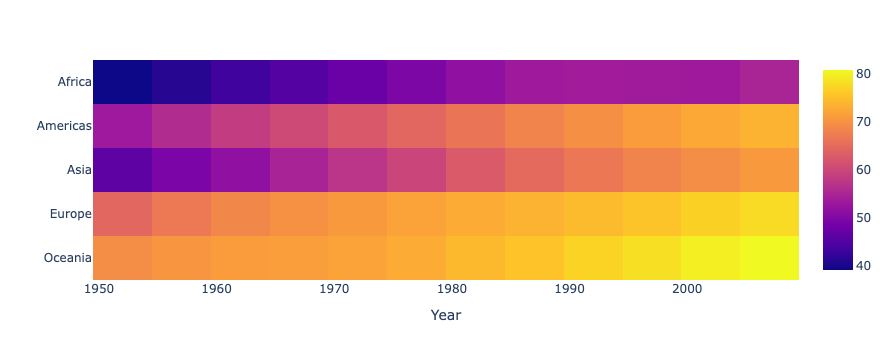

In [53]:

# use imshow() to visualize the data
fig = px.imshow(gapminder_continent_wide)

fig.update_layout(xaxis_title = "Year", yaxis_title = "")

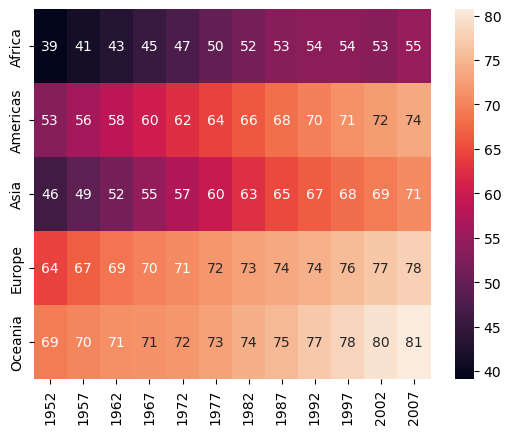

In [54]:
# We can create heatmaps in seaborn as well..

g = sns.heatmap(gapminder_continent_wide, annot=True, fmt=".0f");
g.set_xlabel("");
g.set_ylabel("");

<img src = "https://i.imgflip.com/1ezfdq.jpg">

## 2. Spatial mapping with geopandas

Visualizing spatial data through maps is another powerful way to see trends in data. There are several mapping packages in Python. Here we will use the geopandas package to create maps. 

The geopandas package defines a geopandas DataFrame, which is the same as a pandas DataFrame but has an additional column called `geometry` which specifies geographic information. 

Let's explore this now!


### Visualizing boundaries

Let's start by looking some geopanda DataFrames and visualizing some geometric boundaries.

Below we load the gapminder data again and get the gapminder data from 2007. We also show which maps come with geopandas. 


In [2]:
import geopandas as gpd
import plotly.express as px

gapminder_2007 = px.data.gapminder().query("year == 2007")   # the plotly package comes with the gapminder data


# see which maps come with geopandas
gpd.datasets.available


['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Let's get a geopandas DataFrame that has th countries in the world...

In [4]:
# View the world geopandas DataFrame

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(type(world))

world.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


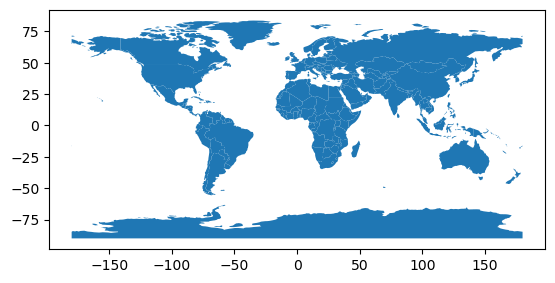

In [58]:
# Plot the world
world.plot();

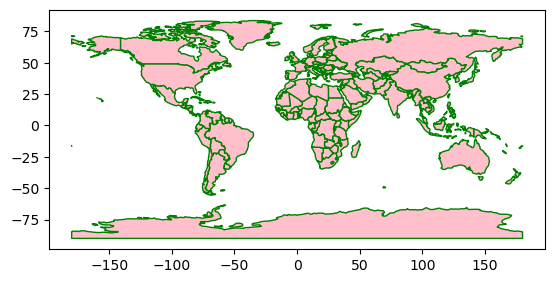

In [62]:
# changing map properties
world.plot(color = "pink", edgecolor = "green");


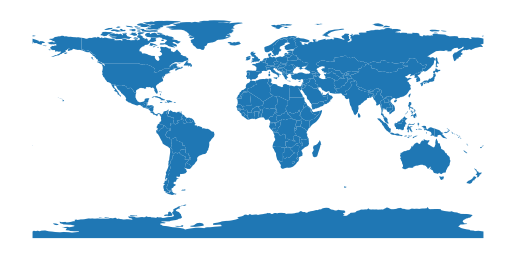

In [57]:
# can turn off the axes
ax = world.plot();
ax.set_axis_off();

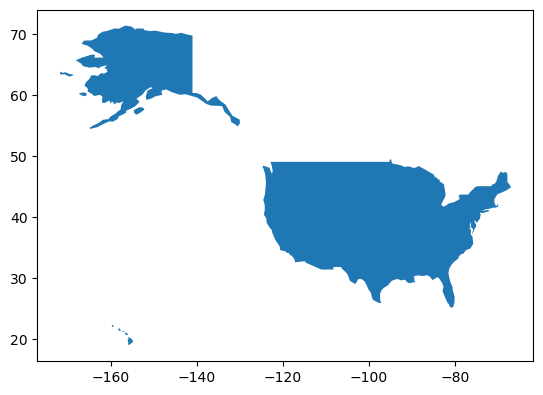

In [18]:
# plot just the united states
world.query("name == 'United States of America'").plot();

### Coordinate reference systems and projections

A coordinate reference system (CRS) is a framework used to precisely measure locations on the surface of the Earth as coordinates. The goal of any spatial reference system is to create a common reference frame in which locations can be measured precisely and consistently as coordinates, which can then be shared unambiguously, so that any recipient can identify the same location that was originally intended by the originator.

There are two different types of coordinate reference systems: Geographic Coordinate Systems and Projected Coordinate Systems. [Projected coordinate systems](https://en.wikipedia.org/wiki/List_of_map_projections) map 3D coordinates into a 2D plane so they can be plotted. Different projected coordiate systems perserve different properties, such as keeping all angles intact which is usefor for navigation (e.g., the Mercator projection) or keeping the size of land areas intact (e.g., the Eckert IV projection). 

A detailed discussion of CRS is beyond the scope of the class. But for the purposes of this class, it is just important that all layers in a map are using the same project (otherwise, for example, data points representing cities and the underlying spatial map won't line up). 

Let's very briefly explore different map projections... 


In [36]:
# Read Graticules (lines on a map)
graticules = gpd.read_file("ne_110m_graticules_10.shp")
print(graticules.crs)
graticules.head(3)

epsg:4326


,degrees,direction,display,dd,ScaleRank,geometry
0,80,N,80 N,80.0,6,"LINESTRING (180.00000 79.99848, 179.99664 79.9..."
1,70,N,70 N,70.0,6,"LINESTRING (180.00000 69.99847, 179.99664 69.9..."
2,60,N,60 N,60.0,6,"LINESTRING (180.00000 59.99866, 179.99664 59.9..."


epsg:4326


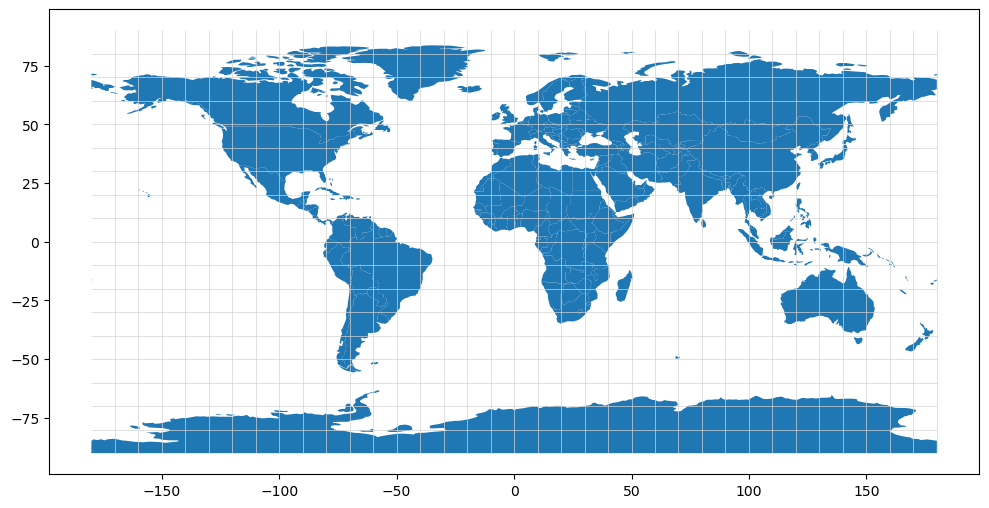

In [55]:
# Web Mercator projection - perserves angles (EPSG:4326 projection)

print(world.crs) # print the default CRS


# plot the map
fig, ax = plt.subplots(figsize=(12,10))
world.plot(ax = ax);
graticules.plot(ax=ax, color="lightgray", linewidth=0.5);

<AxesSubplot: >

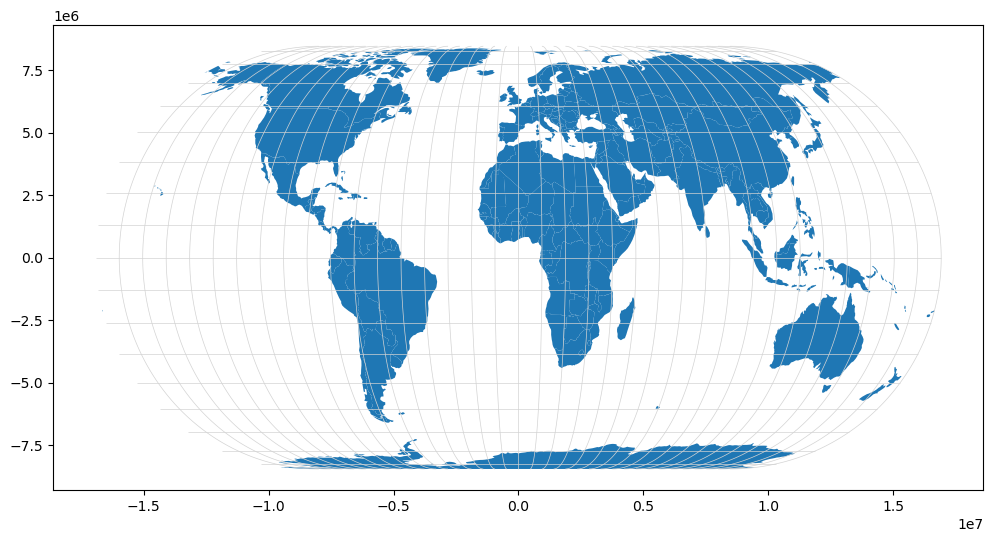

In [38]:
# Eckert IV is an equal-area projection  ("ESRI:54012")

fig, ax = plt.subplots(figsize=(12,10))
world.to_crs("ESRI:54012").plot(ax = ax);
graticules.to_crs("ESRI:54012").plot(ax=ax, color="lightgray", linewidth=0.5);

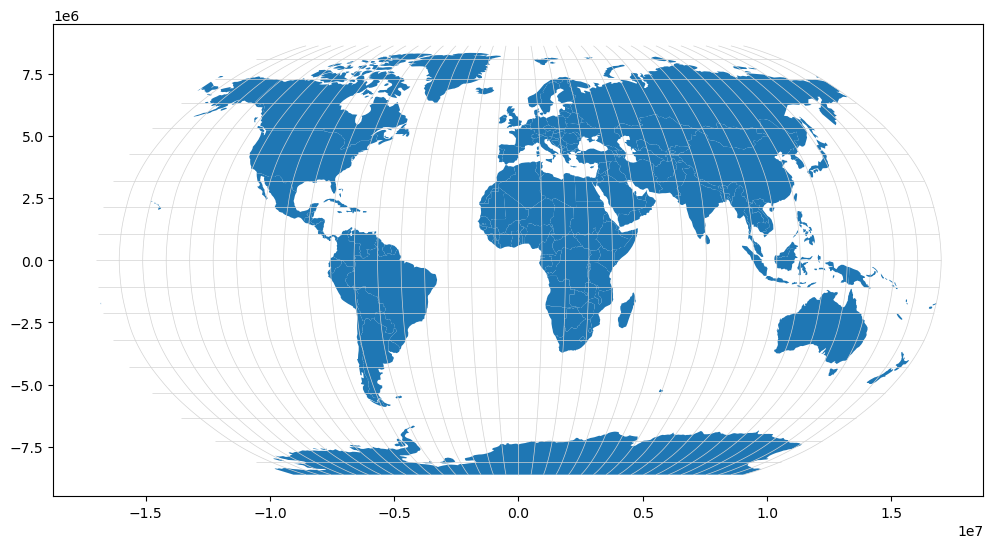

In [40]:
# Robinson projection - neither equal-area nor conformal ("ESRI:54030") 

fig, ax = plt.subplots(figsize=(12,10))
world.to_crs("ESRI:54030").plot(ax = ax);
graticules.to_crs("ESRI:54030").plot(ax=ax, color="lightgray", linewidth=0.5);

To learn more about "What your favorite map projection says about you" see: https://xkcd.com/977/

### Choropleth maps

In choropleth maps, predefined regions are filled in with colors based values of interest. 

Typically to create a choropleth map we join data of interest onto a map. 

Let's explrore this now...


In [19]:
# join the gapminder data onto our world map

world2 = world.merge(gapminder_2007, left_on = "iso_a3", right_on = "iso_alpha")
world2.head(3)

,pop_est,continent_x,name,iso_a3,gdp_md_est,geometry,country,continent_y,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Africa,2007,52.517,38139640,1107.482182,TZA,834
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,Americas,2007,80.653,33390141,36319.235010,CAN,124
2,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,Americas,2007,78.242,301139947,42951.653090,USA,840


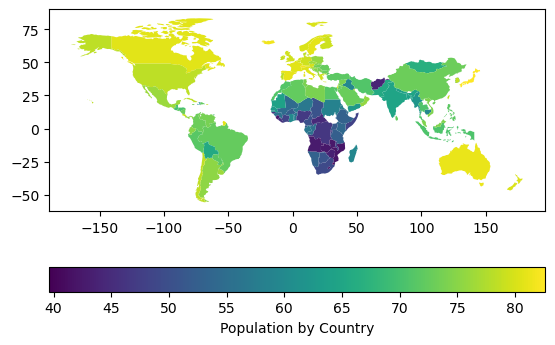

In [7]:
# plot a choropleth map of life expectancy

world2.plot(column='lifeExp', legend = True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"});

<AxesSubplot: >

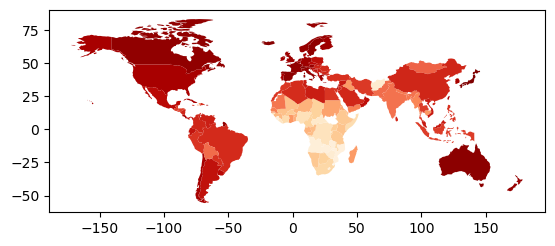

In [8]:
# change the color scale

world2.plot(column='lifeExp', cmap='OrRd')

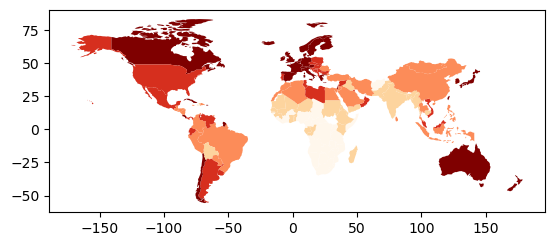

In [10]:
# Can plot quantiles

world2.plot(column='lifeExp', cmap='OrRd', scheme='quantiles');

### Maps with layers and markers

We can also plot points on a map. When doing so, it's important that the points and the underlying map use the same coordinate reference system (CRS).



In [64]:
# Let's load data from city locations

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

print(cities.crs)

cities.head()


epsg:4326


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


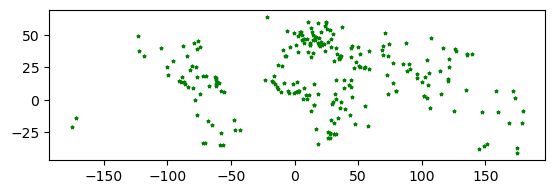

In [12]:
# plot points of the cities

cities.plot(marker='*', color='green', markersize=5);

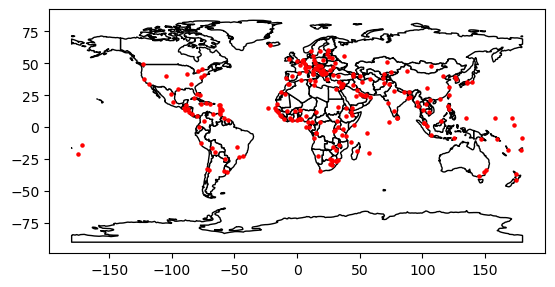

In [13]:

# create a base map
base = world.plot(color='white', edgecolor='black')


# add the cities to the map
cities.plot(ax=base, marker='o', color='red', markersize=5);
